In [5]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
x = np.arange(-10,11)

y = sigmoid(x)

In [7]:
import matplotlib.pyplot as plt

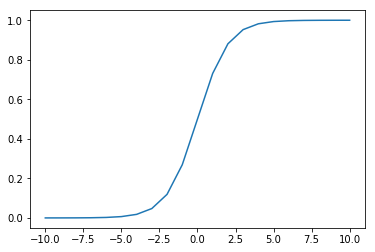

In [8]:
plt.plot(x,y)

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv("titanic.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
import seaborn as sns

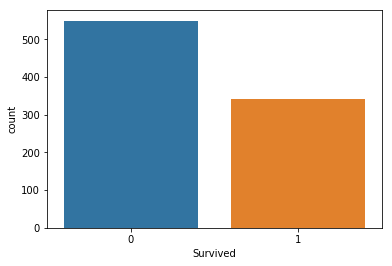

In [16]:
sns.countplot(x="Survived", data=df)

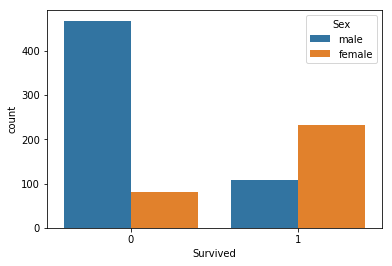

In [17]:
sns.countplot(x="Survived", data=df, hue="Sex")

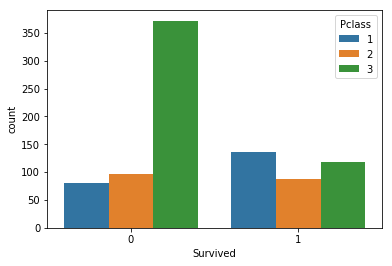

In [18]:

sns.countplot(x="Survived", data=df, hue="Pclass")

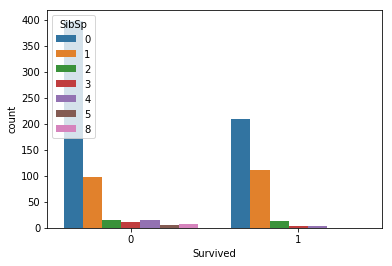

In [19]:
sns.countplot(x="Survived", data=df, hue="SibSp")

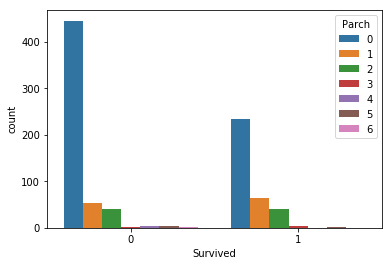

In [20]:
sns.countplot(x="Survived", data=df, hue="Parch")

In [24]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=np.nan, strategy="mean")

df["Age"] = imp.fit_transform(df[["Age"]])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


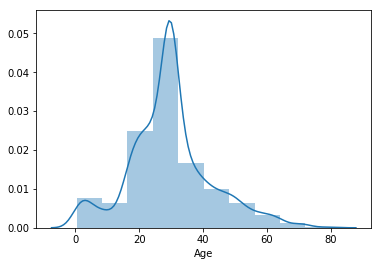

In [26]:
sns.distplot(df["Age"], bins=10)

In [29]:
gender = pd.get_dummies(df["Sex"])

In [30]:
pclass = pd.get_dummies(df['Pclass'])

In [35]:
df = pd.concat([df,gender,pclass],axis=1)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [38]:
df = df.drop(['Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)

In [39]:
df.head()

,PassengerId,Survived,Age,female,male,1,2,3
0,1,0,22.0,0,1,0,0,1
1,2,1,38.0,1,0,1,0,0
2,3,1,26.0,1,0,0,0,1
3,4,1,35.0,1,0,1,0,0
4,5,0,35.0,0,1,0,0,1


In [42]:
y = df["Survived"]

X = df.drop("Survived",axis=1)



In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = lr.predict(X_test)

In [50]:
print(y_pred)

[1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 1 1 1]


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [53]:
confusion_matrix(y_test,y_pred)

array([[158,  16],
       [ 27,  67]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred)

0.8395522388059702

In [56]:
precision_score(y_test,y_pred)

0.8072289156626506

In [57]:
recall_score(y_test,y_pred)

0.7127659574468085

In [58]:
x = df["Age"]
y = sigmoid(x) 

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


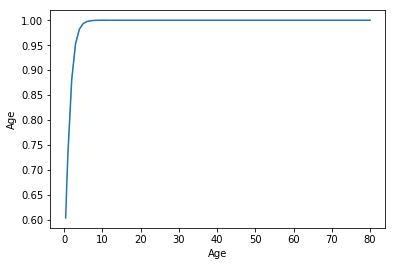

In [60]:
sns.lineplot(x,y)